# 卷积神经网络处理视觉分类

## 数据分配

In [5]:
import os, shutil

original_dataset_dir = '/Users/fchollet/Downloads/kaggle_original_data' # 原始数据解压目录
original_dataset_dir_train = '/Users/fchollet/Downloads/kaggle_original_data/train'
original_dataset_dir_test = '/Users/fchollet/Downloads/kaggle_original_data/test'

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'    # 保存较小数据集的目录
os.mkdir(base_dir)

# 以下分别对应划分后的训练、验证、测试目录
train_dir = os .path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫的训练图像目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

#猫的验证图像目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 猫的测试图像目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗训练图项目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 狗的验证图像目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 狗的测试图像目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 将前1000张猫得图像复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将接下来的500张猫的图像复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将接下来的500张猫的图像复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 接下来为狗的操做
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir_train, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


## 数据检查

In [6]:
print('totle training cat images:', len(os.listdir(train_cats_dir)))
print('totle validation cat images:', len(os.listdir(validation_cats_dir)))
print('totle test cat images:', len(os.listdir(test_cats_dir)))
print('totle training dog images:', len(os.listdir(train_dogs_dir)))
print('totle validation dog images:', len(os.listdir(validation_dogs_dir)))
print('totle test dog images:', len(os.listdir(test_dogs_dir)))

totle training cat images: 1000
totle validation cat images: 500
totle test cat images: 500
totle training dog images: 1000
totle validation dog images: 500
totle test dog images: 500


## 构建网络

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()  # 展示网络

Using TensorFlow backend.
/home/wukong/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/wukong/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/wukong/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/wukong/.local/lib/python3.6/site-packages/tensorflow/python


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)     

In [8]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 数据预处理：预处理为浮点数张量

（1）读取图像文件
（2）将JPEG文件解码为RGB像素网格
（3）将这些像素网格转化为浮点数张量
（4）将像素值（0-255）缩放到[0-1]区间（神经网络喜欢处理较小的输入值）

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# 所有图像乘以1/255缩放
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Python生成器
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # 将所有图像大小调整为150x150
    batch_size=20,       
    class_mode='binary')     # 因为使用了binary_crossentorpy损失，故需要用二进制标签

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 利用批量生成器拟合模型

In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs = 30,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/30
100/100 [==============================] - 42s 421ms/step - loss: 0.6899 - acc: 0.5445 - val_loss: 0.6877 - val_acc: 0.6100
Epoch 2/30
100/100 [==============================] - 43s 432ms/step - loss: 0.6574 - acc: 0.6095 - val_loss: 0.6300 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 43s 432ms/step - loss: 0.6206 - acc: 0.6595 - val_loss: 0.5401 - val_acc: 0.6420
Epoch 4/30
100/100 [==============================] - 44s 441ms/step - loss: 0.5786 - acc: 0.6920 - val_loss: 0.5389 - val_acc: 0.6820
Epoch 5/30
100/100 [==============================] - 44s 438ms/step - loss: 0.5474 - acc: 0.7220 - val_loss: 0.5778 - val_acc: 0.6810
Epoch 6/30
100/100 [==============================] - 43s 434ms/step - loss: 0.5204 - acc: 0.7465 - val_loss: 0.4988 - val_acc: 0.6750
Epoch 7/30
100/100 [==============================] - 43s 431ms/step - loss: 0.4901 - acc: 0.7705 - val_loss: 0.6902 - val_acc: 0.6890
Epoch 8/30
100/100 [==============================] - 

In [11]:
model.save('cats_and_dogs_small_1.h5')   

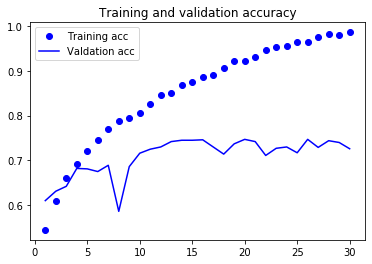

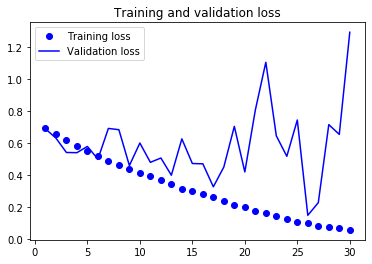

In [12]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Valdation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## 1-使用数据增强：增加样本获得更好的泛化能力，抑制过拟合

In [13]:
datagen = ImageDataGenerator(
    rotation_range=40,        # 图像随机旋转的角度值 
    width_shift_range=0.2,    # 图像在水平或垂直方向上平移的比例
    height_shift_range=0.2,   
    shear_range=0.2,          # 随机错切变换的角度
    zoom_range=0.2,           # 随机缩放的范围
    horizontal_flip=True,     # 随机将一半的图像水平翻转 
    fill_mode='nearest')      # 填充新创建像素的方法

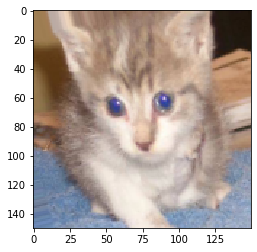

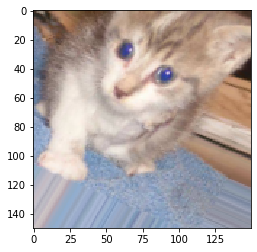

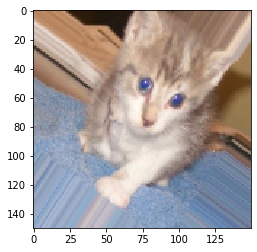

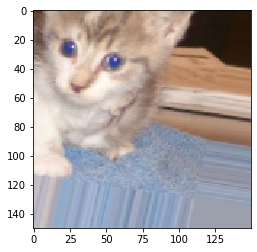

In [14]:
from keras.preprocessing import image  # 图像预处理工具模块

fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)] 
img_path = fnames[3]  # 选择一张图向
img = image.load_img(img_path, target_size=(150, 150))  # 读取图像并调整大小
X = image.img_to_array(img)    # 将其转换为形状为(150,150,3)的numpy数组
X = X.reshape((1,) + X.shape)  # 将其形状变为(1, 150, 150, 3)

i = 0

# 生成随机变换后的图像批量
for batch in datagen.flow(X, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i%4 == 0:
        break
        
plt.show()

## 为了进一步降低过拟合，像模型中添加一个Dropout层，添加到密集连接分类器之前

In [15]:
# 模型搭建
model = models.Sequential()

# 添加卷积层
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))


model.add(layers.Flatten())   # 将3D输出张量展平为1D
model.add(layers.Dropout(0.5))# 添加正则化

# 添加密集连接分类器网络
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# 模型编译
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

'''卷积层学到的是局部模式，具有平移不变性，还可以学到模式的空间层次结构。卷积有两个特征：从输入中提取的图块尺寸；输出特征图的深度
（卷积所计算的过滤器数量）。'''

In [16]:
# 数据增强
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


## 将训练数据增强

In [18]:
test_datagen = ImageDataGenerator(rescale=1./255)  # 验证数据不能增强

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## 训练模型

In [19]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=0)

In [20]:
model.save('cats_and_dogs_small_2.h5')

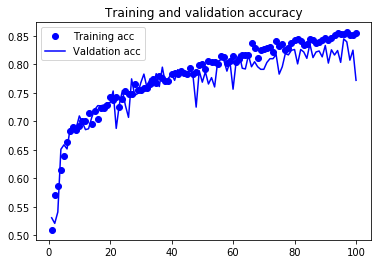

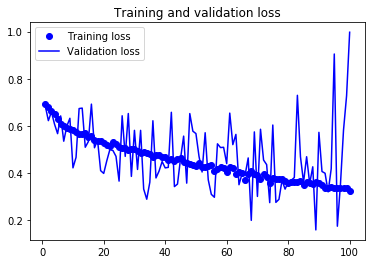

In [21]:
# 绘制结果
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Valdation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [26]:
print(val_acc[-1])

0.7719072103500366


## 2-使用预训练的卷积神经网络
* 特征提取
* 微调模型

## 将VGG16卷积基实例化

In [3]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

### 2.1不使用数据增强的快速特征提取

#### 2.1.1使用预训练的卷积基提取特征

In [4]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/Users/fchollet/Downloads/cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 定义并训练密集连接分类器

In [3]:
# 数据展平为(samples, 8192)
train_features = np.reshape(train_features, (2000, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (1000, 4 * 4 * 512))
test_features = np.reshape(test_features, (1000, 4 * 4 * 512))

from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 2s 975us/step - loss: 0.5936 - acc: 0.6770 - val_loss: 0.4450 - val_acc: 0.8170
Epoch 2/30
2000/2000 [==============================] - 2s 866us/step - loss: 0.4144 - acc: 0.8175 - val_loss: 0.3621 - val_acc: 0.8500
Epoch 3/30
2000/2000 [==============================] - 2s 901us/step - loss: 0.3534 - acc: 0.8495 - val_loss: 0.3214 - val_acc: 0.8680
Epoch 4/30
2000/2000 [==============================] - 2s 951us/step - loss: 0.3197 - acc: 0.8630 - val_loss: 0.3023 - val_acc: 0.8830
Epoch 5/30
2000/2000 [==============================] - 2s 925us/step - loss: 0.2813 - acc: 0.8885 - val_loss: 0.3033 - val_acc: 0.8640
Epoch 6/30
2000/2000 [==============================] - 2s 889us/step - loss: 0.2684 - acc: 0.8935 - val_loss: 0.2743 - val_acc: 0.8860
Epoch 7/30
2000/2000 [==============================] - 2s 908us/step - loss: 0.2464 - acc: 0.9020 - val_loss: 0.2656 - val_acc: 0.8930


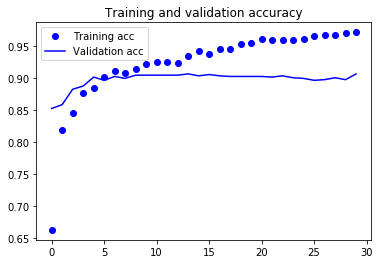

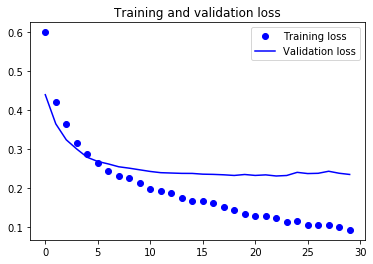

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 2.2-使用数据增强的特征提取

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


### 冻结卷积基

In [8]:
conv_base.trainable = False

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# 不能增强验证数据
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        # 将图像大大小调整为(150,150)
        target_size=(150, 150),
        batch_size=20,
        # 因为使用了binary_crossentropy损失，所以需要用二进制标签
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

## NO.3-微调模型

### 冻结直到某一层的所有层

In [13]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

### 微调模型

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_10.h5')

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()